# Lib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image

(-0.5, 668.5, 599.5, -0.5)

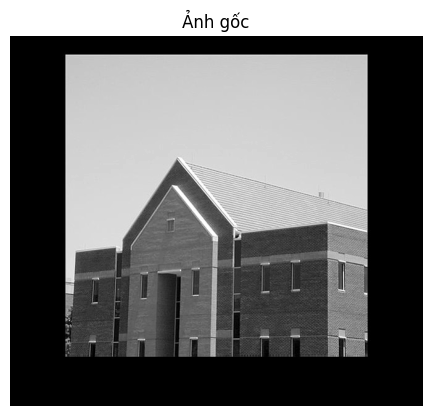

In [3]:
url = '/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/building.jpg'
img = cv2.imread(url, 0)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

# Phát hiện biên



1.   Robert Cross Gradient




(-0.5, 668.5, 599.5, -0.5)

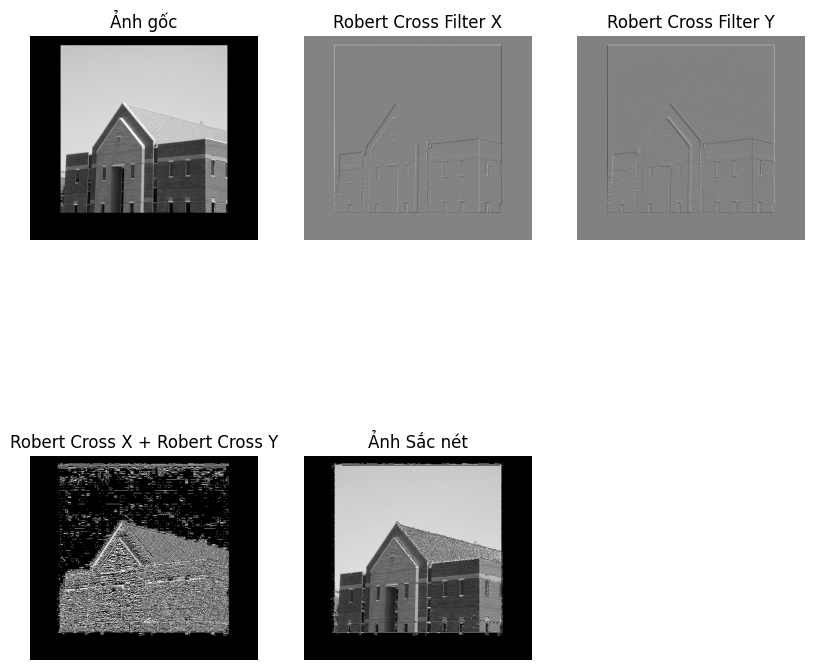

In [4]:
#Kernel
kernel_x = np.array([[0, 0, 0],
                     [0, -1, 0],
                     [0, 0, 1]], dtype=np.float32)

kernel_y = np.array([[0, 0, 0],
                     [0, 0, -1],
                     [0, 1, 0]], dtype=np.float32)

#Áp dụng bộ lọc Robert
grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

#Tính độ lớn của gradient
img_gradient = np.abs(grad_x) + np.abs(grad_y)

#Xy
img_xy = cv2.add(grad_x, grad_y)

#Chuẩn hóa kết quả về khoảng [0, 255]
img_gradient_magnitude = cv2.normalize(img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#Chuyển đổi về kiểu uint8
img_gradient_magnitude = img_gradient_magnitude.astype(np.uint8)
img_xy_magnitude = img_xy.astype(np.uint8)

#Sắc nét ảnh
img_sacnet = img_xy_magnitude + img

#Hiển thị kết quả
plt.figure(figsize=(10, 10))

plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(232)
plt.imshow(grad_x, cmap='gray')
plt.title('Robert Cross Filter X')
plt.axis('off')

plt.subplot(233)
plt.imshow(grad_y, cmap='gray')
plt.title('Robert Cross Filter Y')
plt.axis('off')

plt.subplot(234)
plt.imshow(img_xy_magnitude, cmap='gray')
plt.title('Robert Cross X + Robert Cross Y')
plt.axis('off')

plt.subplot(235)
plt.imshow(img_sacnet, cmap='gray')
plt.title('Ảnh Sắc nét')
plt.axis('off')

##### 2. Prewitt Filter

(-0.5, 668.5, 599.5, -0.5)

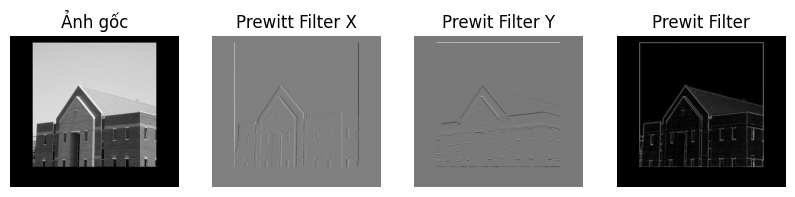

In [5]:
#Kernel
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]], dtype=np.float32)

prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]], dtype=np.float32)

#Áp dụng bộ lọc Robert
prewitt_grad_x = cv2.filter2D(img, cv2.CV_64F, prewitt_kernel_x)
prewitt_grad_y = cv2.filter2D(img, cv2.CV_64F, prewitt_kernel_y)

#Tính độ lớn của gradient
prewitt_img_gradient = np.abs(prewitt_grad_x) + np.abs(prewitt_grad_y)

#Chuẩn hóa kết quả về khoảng [0, 255]
prewitt_img_gradient_magnitude = cv2.normalize(prewitt_img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#Chuyển đổi về kiểu uint8
prewitt_img_gradient_magnitude = prewitt_img_gradient_magnitude.astype(np.uint8)

#Hiển thị kết quả
plt.figure(figsize=(10, 10))

plt.subplot(241)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(242)
plt.imshow(prewitt_grad_x, cmap='gray')
plt.title('Prewitt Filter X')
plt.axis('off')

plt.subplot(243)
plt.imshow(prewitt_grad_y, cmap='gray')
plt.title('Prewit Filter Y')
plt.axis('off')

plt.subplot(244)
plt.imshow(prewitt_img_gradient_magnitude, cmap='gray')
plt.title('Prewit Filter')
plt.axis('off')

##### Sobel Filter

(-0.5, 668.5, 599.5, -0.5)

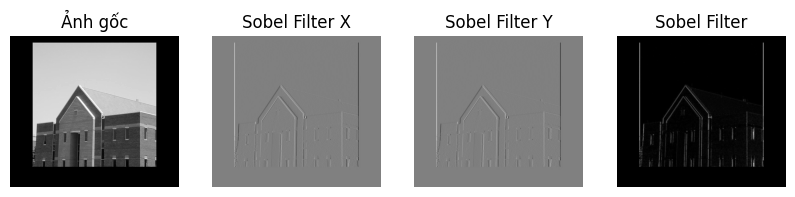

In [6]:
#Kernel
sobel_kernel_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]], dtype=np.float32)

sobel_kernel_y = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]], dtype=np.float32)

#Áp dụng bộ lọc Robert
sobel_grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, sobel_kernel_x)
sobel_grad_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, sobel_kernel_y)

#Tính độ lớn của gradient
sobel_img_gradient = np.abs(sobel_grad_x) + np.abs(sobel_grad_y)

#Chuẩn hóa kết quả về khoảng [0, 255]
sobel_img_gradient_magnitude = cv2.normalize(sobel_img_gradient, None, 0, 255, cv2.NORM_MINMAX)

#Chuyển đổi về kiểu uint8
sobel_img_gradient_magnitude = sobel_img_gradient_magnitude.astype(np.uint8)

#Hiển thị kết quả
plt.figure(figsize=(10, 10))

plt.subplot(241)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(242)
plt.imshow(sobel_grad_x, cmap='gray')
plt.title('Sobel Filter X')
plt.axis('off')

plt.subplot(243)
plt.imshow(sobel_grad_y, cmap='gray')
plt.title('Sobel Filter Y')
plt.axis('off')

plt.subplot(244)
plt.imshow(sobel_img_gradient_magnitude, cmap='gray')
plt.title('Sobel Filter')
plt.axis('off')